<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#零、介绍" data-toc-modified-id="零、介绍-1">零、介绍</a></span></li><li><span><a href="#一、设定主题并爬取" data-toc-modified-id="一、设定主题并爬取-2">一、设定主题并爬取</a></span><ul class="toc-item"><li><span><a href="#（一）设定主题、年份、文章数量" data-toc-modified-id="（一）设定主题、年份、文章数量-2.1">（一）设定主题、年份、文章数量</a></span></li><li><span><a href="#（二）按设定爬取相关文章" data-toc-modified-id="（二）按设定爬取相关文章-2.2">（二）按设定爬取相关文章</a></span></li></ul></li><li><span><a href="#二、文章优选" data-toc-modified-id="二、文章优选-3">二、文章优选</a></span></li><li><span><a href="#三、结果可视化" data-toc-modified-id="三、结果可视化-4">三、结果可视化</a></span></li><li><span><a href="#TEST" data-toc-modified-id="TEST-5">TEST</a></span></li></ul></div>

## 零、介绍
“百优文章”小项目。目的是为了快速找到给主题的100篇经典文章（中文），并实现简单的可视化，供进一步文献分析参考。

## 一、设定主题并爬取


In [24]:
%matplotlib inline

import bs4
import re
import urllib

import pandas as pd
import matplotlib.pyplot as plt


### （一）设定主题、年份、文章数量

In [11]:
# 输入关心的主题
input_subject = '生态价值评估'

# 设置截止年份，默认为2018
# 设置追溯年份，默认为前5年
end_year = 2018
year_interval = 5

# 设置拟采集文章数量，必须为10的倍数，默认为300篇
paper_quantity = 300

**操作步骤：**  
1. 输入查询的关键词，最好是中文，方便后续可视化
2. 设定年份及追溯年份。
3. 设定分析采集的文字数量。

**注意：**  
- 由于百度学术搜索结果存在重复项，因此有可能获取的实际文章数量小于设定值。
- 当查询主题较为冷僻、文章数量过少，而不足设定值时，爬虫输出结果会出错，建议先在[百度学术的网页](http://xueshu.baidu.com/)中搜索并估计下文章丰富程度，选定合适的关键词进行搜索，一般而言，设定为300-500篇较为合适

### （二）按设定爬取相关文章

**计算年份、爬取页数**

In [12]:
start_year = end_year - year_interval
paper_page_quantity = round(paper_quantity / 10)

**自定义爬取所需函数**

In [7]:
# 定义一个设定url的函数getURL()，包括三个参数：words是关键词，可以是中文；
# page是指定的页数；year是年份。函数会返回指定年份前五年的搜索结果（指定页），默认值为第1页、2012-2017年，例如getURL(1, 2017)
def getURL(words, page=1, year=2018):
    words = urllib.parse.quote(words)
    url = 'http://xueshu.baidu.com/s?wd={words}&pn={page}0&tn=SE_baiduxueshu_c1gjeupa&ie=utf-8&filter=sc_year%3D%7B{year_start}%2C{year_end}%7D&sc_hit=1'.format(words=words, page=page-1, year_start=start_year, year_end=end_year)
    return url

# 定义获取网页内容的函数
def getHtml(url):
    response = urllib.request.urlopen(url)
    html = response.read().decode('utf-8', 'ignore')
    return html

# 定义一个获取文章信息的函数get_info()
def get_info(html_label, info_type='text'):
    '''
    用来获取文章的各项指标信息。只需要一个参数：html_label为CSS标签选择器，为string格式。可选参数info_type默认为text，可设置为data，此时返回数值型信息如引用量、年份等。
    '''
    index = soup.select(html_label)
    if info_type == 'text':
        return([index[i].getText() for i in range(len(index))])
    elif info_type == 'data':
        # 利用正则表达式来提取字符串中的数字，其中'\d{1,5}'表明匹配一个5位数以下的数字，估计能超过10万引用量的文章几乎没有吧
        get_data = []
        for i in range(len(index)):
            try:
                get_data += [re.search('\d{1,5}', index[i].getText()).group()]
            except AttributeError: 
                get_data += ['NA']            
        return(get_data)
    else:
        print('无法获取该属性{}'.format(html_label))

**爬取百度学术搜索结果**

In [13]:
# 初始化需要获取的几个文章属性指标
paper_title_list = []
paper_abstract_list = []
paper_time_list = []
paper_CitedCount_list = []
all_paper_keywords = []

# 分页获取文章信息。默认为30篇。
for i in range(paper_page_quantity):
    url = getURL(input_subject, i, end_year)
    print('开始获取第{}页文献...'.format(i+1))
    html = getHtml(url)
    
    soup = bs4.BeautifulSoup(html, "lxml")
    
    # 获取文章标题、摘要
    paper_title_list += get_info('div.sc_content h3 a')
    paper_abstract_list += get_info('div.c_abstract')
    # 获取文章年份、被引量，为数字型
    paper_time_list += get_info('span.sc_time', info_type='data')
    paper_CitedCount_list += get_info('div.sc_info span[class=""]', info_type='data')
    # 获取所有文章的关键词
    all_paper_keywords += get_info('div .sc_subject a')

开始获取第1页文献...
开始获取第2页文献...
开始获取第3页文献...
开始获取第4页文献...
开始获取第5页文献...
开始获取第6页文献...
开始获取第7页文献...
开始获取第8页文献...
开始获取第9页文献...
开始获取第10页文献...
开始获取第11页文献...
开始获取第12页文献...
开始获取第13页文献...
开始获取第14页文献...
开始获取第15页文献...
开始获取第16页文献...
开始获取第17页文献...
开始获取第18页文献...
开始获取第19页文献...
开始获取第20页文献...
开始获取第21页文献...
开始获取第22页文献...
开始获取第23页文献...
开始获取第24页文献...
开始获取第25页文献...
开始获取第26页文献...
开始获取第27页文献...
开始获取第28页文献...
开始获取第29页文献...
开始获取第30页文献...


**保存爬取文章**

In [37]:
# 将获取的数据转换为可分析的df
data = {'Title':paper_title_list, 'Year':paper_time_list, 'Cited_Count':paper_CitedCount_list}
df = pd.DataFrame(data)
df.Year = df.Year.astype('int32')
df.Cited_Count = df.Cited_Count.astype('int32')

In [88]:
# 设定文件保存路径，导出数据
out_csv = input_subject + '.csv'
df.to_csv(out_csv, encoding='utf-8')

**爬取结果可视化**

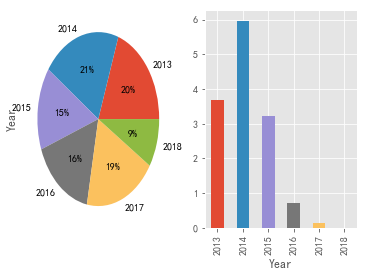

In [87]:
#plt.figure(figsize=(20, 8))
fig, axs = plt.subplots(1,2)
plt.style.use('ggplot')
df.groupby('Year')['Year'].count().plot(kind='pie', subplots=True, autopct='%.0f%%', ax=axs[0])
df['Cited_Count'].groupby(df['Year']).mean().plot(kind='bar', ax=axs[1])
plt.rc('font', family='SimHei')
#plt.title('各年度文章平均引用频次')
#plt.legend()
plt.show();

## 二、文章优选

**清理数据**

In [98]:
# 年份缺失的数据填写为起始年份，降低其重要性
df['Year'] = df['Year'].fillna(start_year)
df = df.drop_duplicates(subset='Title')
print('设定采集 '+ str(paper_quantity) + ' 篇。')
print('删除重复文章 ' + str(paper_quantity - len(df)) + ' 篇；')
print('实际有效 '+ str(len(df)) + ' 篇。')

设定采集 300 篇。
删除重复文章 19 篇；
实际有效 281 篇。


**文章优选**

In [100]:
# 编写优选算法，考虑引用量、年份、主题相关性三个因素。
# 首先对引用量进行标准化。
def trans_min_max(df):
    '''数据标准化处理，采用min-max标准化'''
    df_trans = (df - df.min()) / (df.max() - df.min())
    return df_trans
df['Rank_Index'] = trans_min_max(df['Cited_Count'])
# 再用年份进行加权
df['weighted_year'] = 1
df['weighted_year'] = (df['Year'] - start_year)*0.2
df['Rank_Index'] = df['Rank_Index'] * df['weighted_year']
# 再用主题相关性进行加权
df['Rank_Index'] = df['Rank_Index'] * (len(df) - df.index) / len(df)

# 排序并选择前100篇
df = df.sort_values(['Rank_Index'], ascending=False)
df_papers = df.iloc[:100,:]
# 重新计算文章重要性
df_papers['Rank_Index'] = trans_min_max(df_papers['Rank_Index'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**保存结果**

In [107]:
top100_txt = input_subject + 'TOP100_For_NoteExpress.txt'

# 转换为NoteExpress可读的格式
def paper_info(df):
    paper_str = ''
    for row in df.itertuples():
        paper_str = paper_str + \
                    '{Reference Type}: Journal Article\n' + \
                    '{Year}: ' + str(row[2]) + '\n' + \
                    '{Title}: ' + str(row[1]) + '\n' + \
                    '{Cited Count}: ' + str(row[3]) + '\n' + \
                    '{Custom 1}: '  + str(row[4]) + '\n\n'
    return paper_str

with open(top100_txt,'w') as f:
    f.write(paper_info(df_papers))

## 三、结果可视化

**关键词词云**

操作指南：  
1. 替换`masked.png`控制词云的形状；  
2. 修改`max_font_size=20、scale=5、font_path="Deng.ttf"`控制图像显示效果


In [108]:
print('\n相关文献的关键词包括：\n{}'.format(all_paper_keywords))


相关文献的关键词包括：
['时空格局', '西北地区', '植被净初级生产力', '生态价值', '估算模型', '评价研究', '生态价值', '生态价值评估', '评估方法', '补偿标准', '生态价值', '应用情况', '滨海湿地', '生态价值', '可持续发展', '黄河口', '滨海湿地', '生态服务功能', '价值评估', '海藻养殖', '中国近海', '价值评估', '养殖生态', '生态系统服务', '资产评估', '价值评估', '生态价值', '拉动效应', '生态价值评估', '大围山', '国家生态旅游示范区', '东寨港', '温室气体', '湿地生态', '红树林', '红树林湿地', '实证分析', '差异性', '支付意愿', '条件价值法', '辽河流域', '时空格局', '西北地区', '植被净初级生产力', '生态价值', '估算模型', '评价研究', '生态价值', '生态价值评估', '评估方法', '补偿标准', '生态价值', '应用情况', '滨海湿地', '生态价值', '可持续发展', '黄河口', '滨海湿地', '生态服务功能', '价值评估', '海藻养殖', '中国近海', '价值评估', '养殖生态', '生态系统服务', '资产评估', '价值评估', '生态价值', '拉动效应', '生态价值评估', '大围山', '国家生态旅游示范区', '东寨港', '温室气体', '湿地生态', '红树林', '红树林湿地', '实证分析', '差异性', '支付意愿', '条件价值法', '辽河流域', '评价研究', '生态价值', '多功能', '进展分析', '价值评估', '生态价值', '布局优化', '京津冀', '林业生态工程', '生态价值', '生态环境', 'CLUE-S模型', '土地利用', '情景模拟', '价值评估', '生态系统服务价值', '土壤保持功能', '生态系统服务', '价值评估', '生态价值', '水库流域', '化感作用', '生态价值', '证券化', '机制探讨', '生态资源', '价值评估', '生态补偿', '价值评估', '国家生态旅游示范区', '大围山', '预测研究', '养分循环', '耕作模式', '小麦玉米', '价值评估

In [145]:
# 统计关键词词频，用Counter函数统计出现次数，返回值转换为dict类型。
from collections import Counter
keyword_frequency = dict(Counter(all_paper_keywords))
# 统计关键词总数，用次数除以总数，将次数转换为频率
len_keyword = len(all_paper_keywords)
for key,values in keyword_frequency.items():
    keyword_frequency[key] = float(values/len_keyword)

# 用词云可视化关键词
from wordcloud import WordCloud, ImageColorGenerator
import imageio

**设置词云显示**

In [163]:
# 读取背景图片
color_mask = imageio.imread("masked.png")
# 用.generate_from_frequencies()方法可视化，设置WordCloud相关参数
wordcloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path="Deng.ttf",
    #设置背景色
    background_color='white',
    #词云形状
    mask=color_mask,
    #允许最大词汇
    max_words=1000,
    # 最大号字体，关系到可视化多少关键词、词云紧密程度
    max_font_size=80,
    # 设置图像比例，影响保存图片的大小
    scale=2,
    # 随机颜色方案
    random_state=42
    )

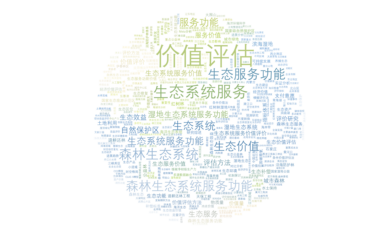

In [164]:
# 生成词云
wordcloud.generate_from_frequencies(keyword_frequency)

# 用ImageColorGenerator生成图片颜色，按此重新着色
image_colors = ImageColorGenerator(color_mask)
wordcloud.recolor(color_func=image_colors)


# 保存图片
wordcloud.to_file('keyword_cloud.jpg')
# 显示图片
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TEST

In [111]:
keyword_frequency

{'时空格局': 2,
 '西北地区': 2,
 '植被净初级生产力': 2,
 '生态价值': 31,
 '估算模型': 2,
 '评价研究': 7,
 '生态价值评估': 5,
 '评估方法': 11,
 '补偿标准': 3,
 '应用情况': 2,
 '滨海湿地': 6,
 '可持续发展': 3,
 '黄河口': 2,
 '生态服务功能': 40,
 '价值评估': 220,
 '海藻养殖': 2,
 '中国近海': 2,
 '养殖生态': 2,
 '生态系统服务': 62,
 '资产评估': 2,
 '拉动效应': 2,
 '大围山': 3,
 '国家生态旅游示范区': 3,
 '东寨港': 2,
 '温室气体': 2,
 '湿地生态': 3,
 '红树林': 4,
 '红树林湿地': 3,
 '实证分析': 3,
 '差异性': 2,
 '支付意愿': 5,
 '条件价值法': 2,
 '辽河流域': 2,
 '多功能': 1,
 '进展分析': 2,
 '布局优化': 1,
 '京津冀': 1,
 '林业生态工程': 1,
 '生态环境': 3,
 'CLUE-S模型': 1,
 '土地利用': 5,
 '情景模拟': 1,
 '生态系统服务价值': 12,
 '土壤保持功能': 1,
 '水库流域': 1,
 '化感作用': 1,
 '证券化': 1,
 '机制探讨': 2,
 '生态资源': 1,
 '生态补偿': 5,
 '预测研究': 2,
 '养分循环': 1,
 '耕作模式': 1,
 '小麦玉米': 1,
 '有机质积累': 1,
 '时空变化分析': 1,
 '传统农业': 1,
 '生态系统': 28,
 '评价指标体系': 1,
 '实证研究': 1,
 '资源保护': 1,
 '自然保护区': 14,
 '五角枫': 1,
 '内蒙古': 2,
 '多样性': 1,
 '农用地': 1,
 '城市中心区': 1,
 '屋顶绿化': 1,
 '文献计量': 1,
 '知识图谱': 1,
 '黄河三角洲': 1,
 '盐碱地': 1,
 '棉花种植': 1,
 '文献计量学': 1,
 '海洋生态': 2,
 '三峡库区': 2,
 '生态系统服务功能': 23,
 '耕地转移': 2,
 '释放O2': 1,
 'CO2释放': 1,

In [109]:
all_paper_keywords

['时空格局',
 '西北地区',
 '植被净初级生产力',
 '生态价值',
 '估算模型',
 '评价研究',
 '生态价值',
 '生态价值评估',
 '评估方法',
 '补偿标准',
 '生态价值',
 '应用情况',
 '滨海湿地',
 '生态价值',
 '可持续发展',
 '黄河口',
 '滨海湿地',
 '生态服务功能',
 '价值评估',
 '海藻养殖',
 '中国近海',
 '价值评估',
 '养殖生态',
 '生态系统服务',
 '资产评估',
 '价值评估',
 '生态价值',
 '拉动效应',
 '生态价值评估',
 '大围山',
 '国家生态旅游示范区',
 '东寨港',
 '温室气体',
 '湿地生态',
 '红树林',
 '红树林湿地',
 '实证分析',
 '差异性',
 '支付意愿',
 '条件价值法',
 '辽河流域',
 '时空格局',
 '西北地区',
 '植被净初级生产力',
 '生态价值',
 '估算模型',
 '评价研究',
 '生态价值',
 '生态价值评估',
 '评估方法',
 '补偿标准',
 '生态价值',
 '应用情况',
 '滨海湿地',
 '生态价值',
 '可持续发展',
 '黄河口',
 '滨海湿地',
 '生态服务功能',
 '价值评估',
 '海藻养殖',
 '中国近海',
 '价值评估',
 '养殖生态',
 '生态系统服务',
 '资产评估',
 '价值评估',
 '生态价值',
 '拉动效应',
 '生态价值评估',
 '大围山',
 '国家生态旅游示范区',
 '东寨港',
 '温室气体',
 '湿地生态',
 '红树林',
 '红树林湿地',
 '实证分析',
 '差异性',
 '支付意愿',
 '条件价值法',
 '辽河流域',
 '评价研究',
 '生态价值',
 '多功能',
 '进展分析',
 '价值评估',
 '生态价值',
 '布局优化',
 '京津冀',
 '林业生态工程',
 '生态价值',
 '生态环境',
 'CLUE-S模型',
 '土地利用',
 '情景模拟',
 '价值评估',
 '生态系统服务价值',
 '土壤保持功能',
 '生态系统服务',
 '价值评估',
 '生态价值',
 '水库流域',
 '化感作用',
 '生态价值',
 '证券化',
 '机制探

In [105]:
df_papers.head()

,Title,Year,Cited_Count,Rank_Index,weighted_year
59,重庆市森林生态系统服务功能价值评估,2014,72,1.000000,0.2
73,吉林森工集团森林生态系统服务价值评价及预测研究,2015,25,0.654103,0.4
65,青海湖湿地生态系统服务价值评估,2015,13,0.352121,0.4
62,神农架自然保护区森林生态系统服务价值评估,2014,25,0.342900,0.2
75,张掖黑河湿地自然保护区生态服务功能价值评估,2015,13,0.337137,0.4


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
Title          300 non-null object
Year           300 non-null object
Cited_Count    300 non-null object
dtypes: object(3)
memory usage: 7.1+ KB


In [92]:
len(df)

281